<a href="https://colab.research.google.com/github/sanjeevm4788/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('Telecom Churn.csv')

In [ ]:
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
dataset.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
dataset.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
dataset.shape

(3333, 20)

In [ ]:
dataset.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

No null values in the dataset

In [ ]:
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
dataset.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

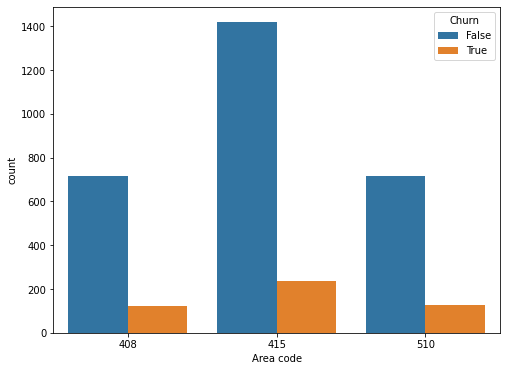

In [ ]:
sns.countplot( data=dataset, x="Area code", hue='Churn');

Area code don't have that much relation with churn

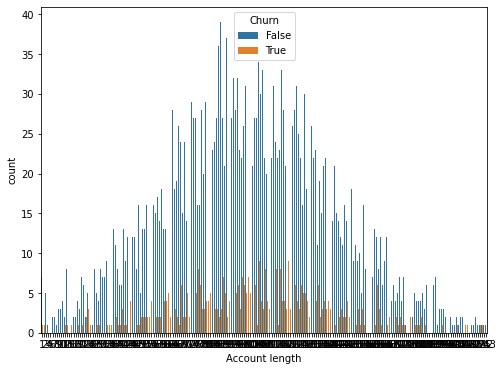

In [ ]:
sns.countplot( data=dataset, x="Account length", hue='Churn');

Account length doesn't seem relevent with churn

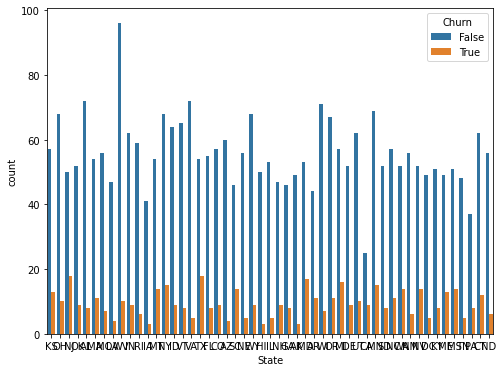

In [ ]:
sns.countplot( data=dataset, x="State", hue='Churn');

State doesn't seem relevent with churn

In [ ]:
dataset.drop(["State","Account length","Area code"], axis=1, inplace = True )

Removing unwanted parameters from the dataset

In [ ]:
dataset.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


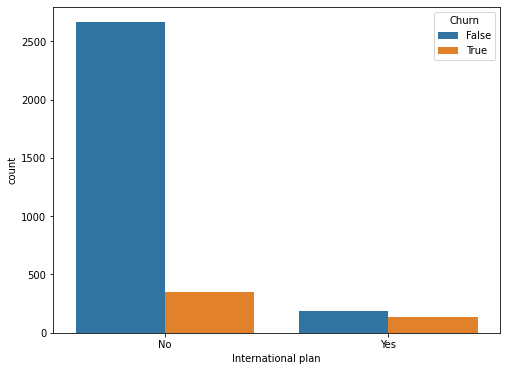

In [ ]:
sns.countplot(data=dataset, x='International plan', hue='Churn')

High churn rate for customer with international plan

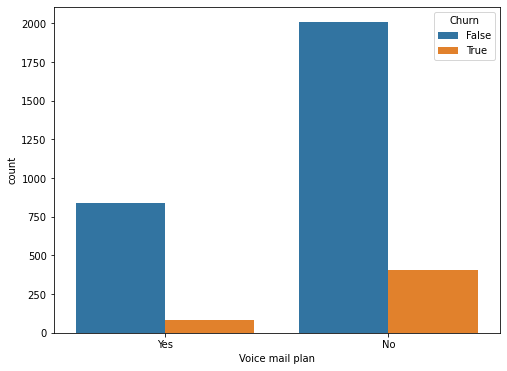

In [ ]:
sns.countplot(data=dataset, x='Voice mail plan', hue='Churn')

similar churn distribution for customer with voice mail plan

In [ ]:
pd.crosstab(dataset['Churn'], dataset["Total day minutes"], margins=True)

Total day minutes,0.0,2.6,7.8,7.9,12.5,17.6,18.9,19.5,25.9,27.0,29.9,30.9,34.0,35.1,37.7,37.8,39.5,40.4,40.9,41.9,44.9,45.0,46.5,47.4,47.7,47.8,48.4,49.2,49.9,50.6,51.1,51.5,51.8,51.9,52.2,54.0,54.2,54.7,54.8,55.3,...,300.4,301.5,301.7,302.7,303.2,303.9,305.1,305.2,306.2,307.1,308.0,308.6,309.9,310.4,312.0,313.2,313.8,314.1,314.6,315.6,317.8,321.1,321.3,321.6,322.3,322.4,322.5,324.7,326.3,326.5,328.1,329.8,332.9,334.3,335.5,337.4,345.3,346.8,350.8,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,...,1,0,1,1,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2850
True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,2,1,0,0,0,0,1,0,0,2,1,0,1,1,0,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,483
All,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3333


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


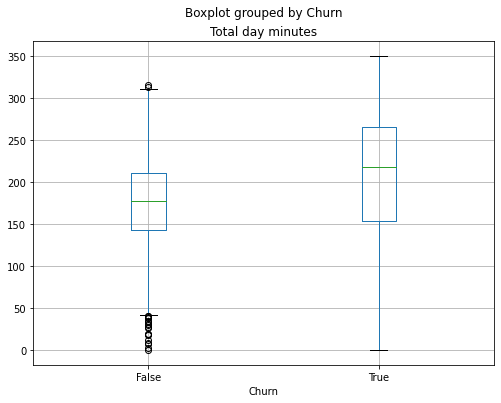

In [ ]:
dataset.boxplot(column='Total day minutes',by='Churn')

The median, minimum and maximum differs

In [ ]:
pd.crosstab(dataset['Churn'], dataset["Total eve minutes"], margins=True)

Total eve minutes,0.0,31.2,42.2,42.5,43.9,48.1,49.2,52.9,56.0,58.6,58.9,60.0,60.8,61.9,64.3,65.2,66.0,66.5,67.0,67.5,69.2,70.9,71.0,72.9,73.2,74.6,75.3,75.9,76.4,77.1,77.9,78.3,78.9,79.3,80.0,80.6,80.8,81.0,81.9,82.2,...,317.0,317.2,317.5,317.8,318.7,318.8,319.0,319.3,320.5,320.9,322.2,322.3,322.7,323.2,324.7,324.8,327.0,327.1,328.2,328.7,329.3,329.8,330.6,332.1,332.8,335.0,335.7,336.0,337.1,339.9,341.3,347.3,348.5,350.5,350.9,351.6,354.2,361.8,363.7,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,2,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,1,1,1,0,2850
True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,483
All,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3333


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


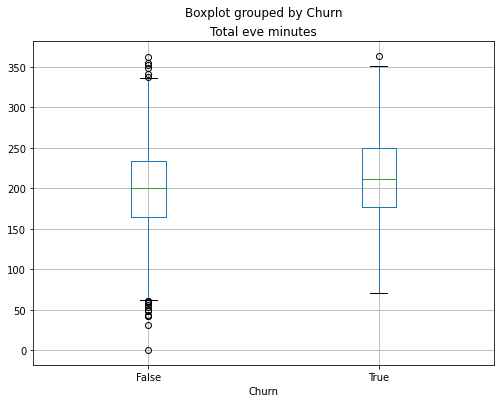

In [ ]:
dataset.boxplot(column='Total eve minutes',by='Churn')

The median, minimum and maximum are quite similar

In [ ]:
pd.crosstab(dataset['Churn'], dataset["Total night minutes"], margins=True)

Total night minutes,23.2,43.7,45.0,47.4,50.1,53.3,54.0,54.5,56.6,57.5,61.4,63.3,63.6,64.2,65.7,65.8,67.7,70.6,71.1,72.2,72.4,73.2,73.7,75.8,76.4,76.5,77.2,77.3,77.9,78.1,79.3,79.7,79.9,80.2,81.6,82.3,82.4,83.9,84.8,85.8,...,312.8,313.2,313.4,314.1,315.0,316.7,317.8,318.3,320.7,321.2,321.3,322.2,323.0,323.5,325.6,325.9,326.0,326.4,328.5,329.2,329.3,332.7,333.5,334.7,342.8,344.3,345.8,349.2,349.7,350.2,352.2,352.5,354.9,364.3,364.9,367.7,377.5,381.9,395.0,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,2,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0,1,2,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,2850
True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,483
All,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3333


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


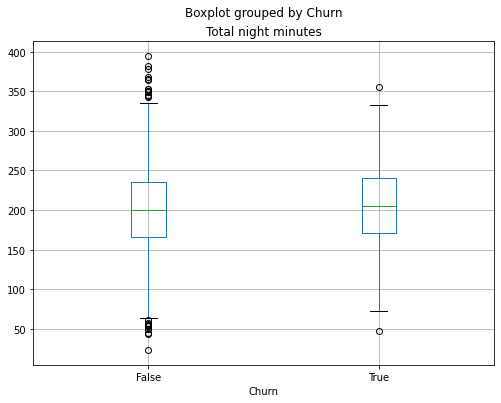

In [ ]:
dataset.boxplot(column='Total night minutes',by='Churn')

The median, minimum and maximum are quite similar

In [ ]:
pd.crosstab(dataset['Churn'], dataset["Total intl minutes"], margins=True)

Total intl minutes,0.0,1.1,1.3,2.0,2.1,2.2,2.4,2.5,2.6,2.7,2.9,3.1,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,...,14.4,14.5,14.6,14.7,14.8,14.9,15.0,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8,15.9,16.0,16.1,16.2,16.3,16.4,16.5,16.6,16.7,16.9,17.0,17.1,17.2,17.3,17.5,17.6,17.8,17.9,18.0,18.2,18.3,18.4,18.9,20.0,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,18,1,1,1,2,1,1,1,1,1,2,1,2,1,4,2,4,5,1,2,2,6,3,5,4,4,4,4,7,8,8,5,8,9,8,10,7,10,20,12,...,12,8,12,14,9,7,10,7,7,5,6,7,8,3,4,4,3,5,4,2,5,4,2,2,3,3,1,1,1,2,1,2,0,3,2,0,1,1,0,2850
True,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,1,0,2,0,1,0,0,2,0,0,3,1,1,2,2,4,2,1,...,5,3,1,2,3,0,0,0,1,3,2,1,1,1,2,0,0,1,0,0,1,0,0,1,2,1,0,0,2,1,1,0,1,0,0,1,0,0,1,483
All,18,1,1,2,2,1,1,1,1,1,2,1,2,1,4,2,4,5,2,2,4,7,4,5,6,4,5,4,7,10,8,5,11,10,9,12,9,14,22,13,...,17,11,13,16,12,7,10,7,8,8,8,8,9,4,6,4,3,6,4,2,6,4,2,3,5,4,1,1,3,3,2,2,1,3,2,1,1,1,1,3333


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


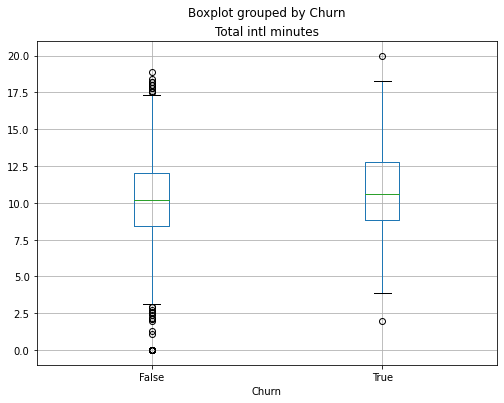

In [ ]:
dataset.boxplot(column='Total intl minutes',by='Churn')

The median, minimum and maximum are quite similar

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


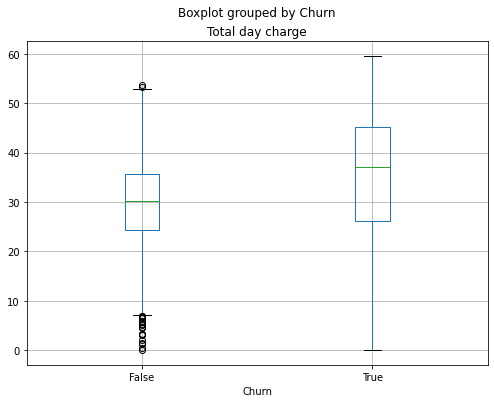

In [ ]:
dataset.boxplot(column='Total day charge',by='Churn')

The median, minimum and maximum differs

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


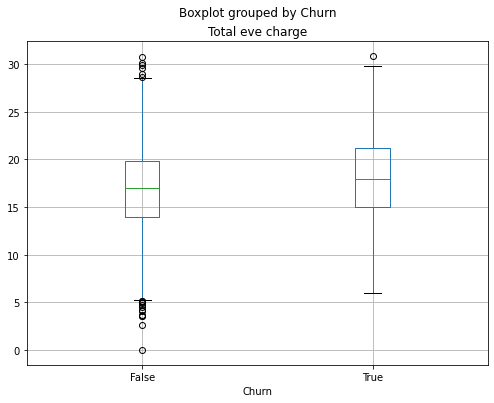

In [ ]:
dataset.boxplot(column='Total eve charge',by='Churn')

The median, minimum and maximum are quite similar

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


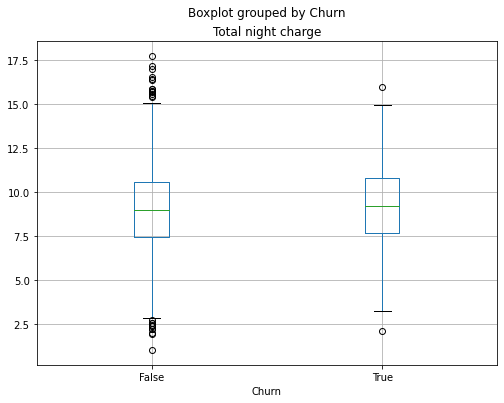

In [ ]:
dataset.boxplot(column='Total night charge',by='Churn')

The median, minimum and maximum are quite similar

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


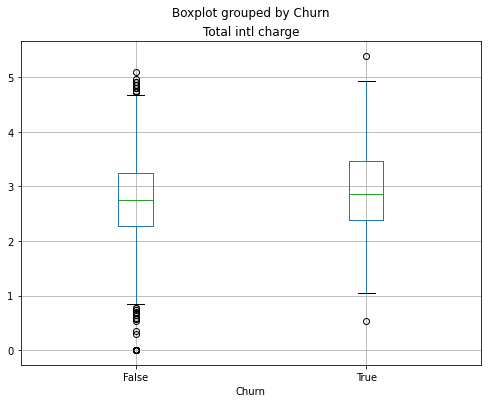

In [ ]:
dataset.boxplot(column='Total intl charge',by='Churn')

The median, minimum and maximum are quite similar

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


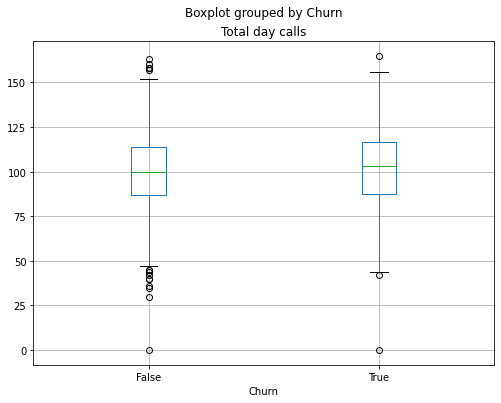

In [ ]:
dataset.boxplot(column='Total day calls',by='Churn')

The median, minimum and maximum are quite similar

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


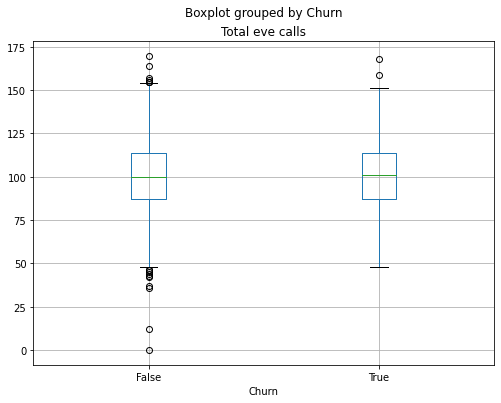

In [ ]:
dataset.boxplot(column='Total eve calls',by='Churn')

The median, minimum and maximum are quite similar

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


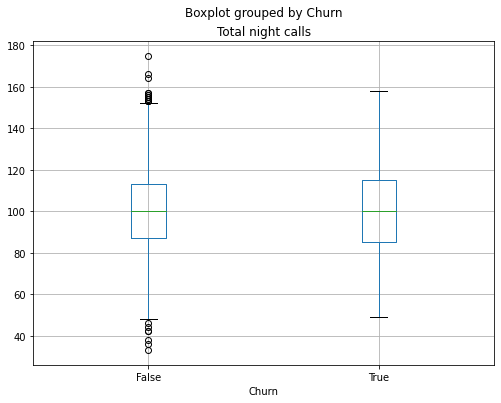

In [ ]:
dataset.boxplot(column='Total night calls',by='Churn')

The median, minimum and maximum are quite similar

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


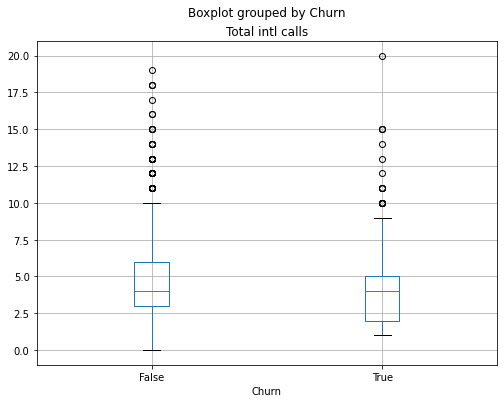

In [ ]:
dataset.boxplot(column='Total intl calls',by='Churn')

The median is similar but minimum and maximum differs

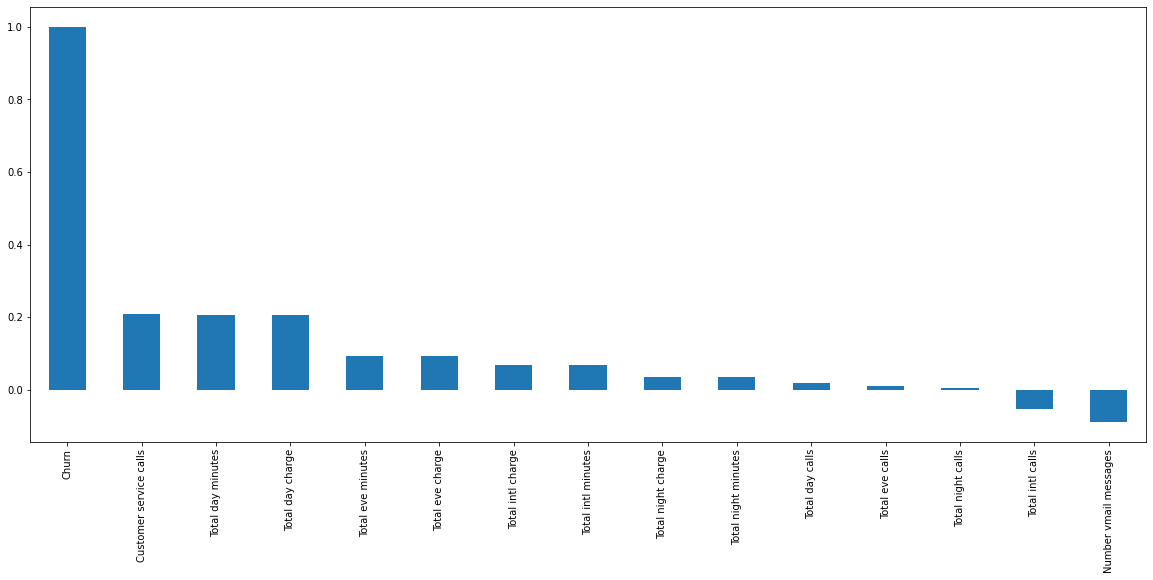

In [ ]:
plt.figure(figsize=(20,8))
dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

customer serivce calls have higher correlation than other parameters

In [ ]:
pd.crosstab(dataset['Churn'], dataset["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


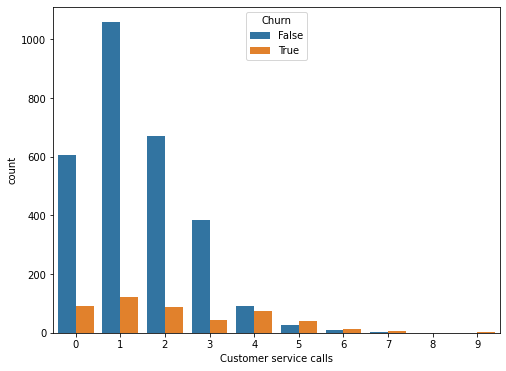

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="Customer service calls", hue='Churn', data=dataset);

Customer with 4 and above customer service calls have high churn rate

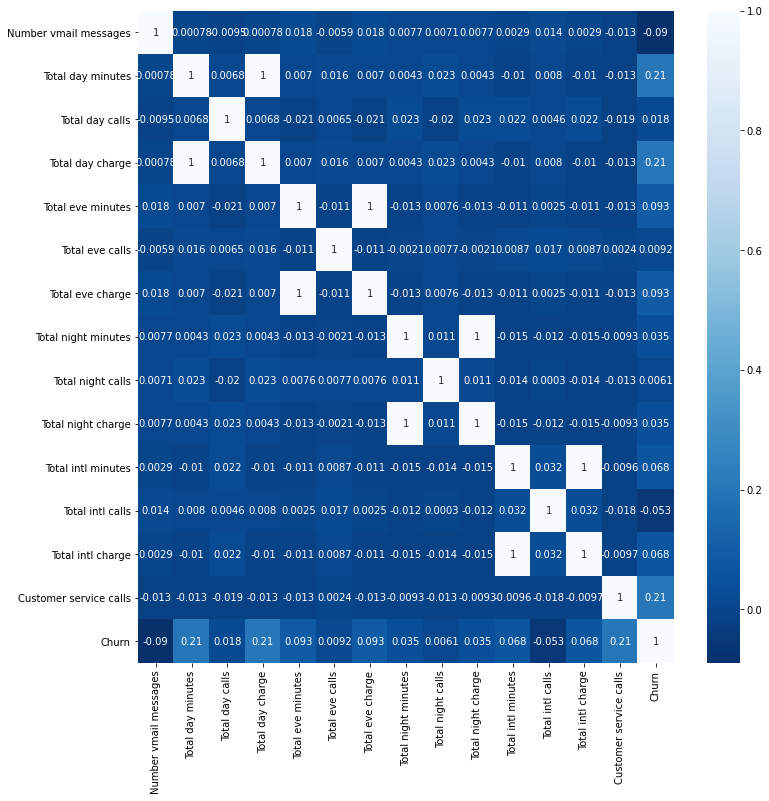

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(), cmap='Blues_r', annot=True)

linear dependency between minutes and charge

**CONCLUSION:**


1.Customer with more than 3 customer service call have higher churn rate.


2.Customer with internatinal plan tend to churn quite often.

3.Customer with high day and evening minutes have higher churn rate.


**So the above factors can be looked into to reduce customer churn rate**